# Obesity Dataset Analysis: EDA 

### Data Collection
-Dataset Source - 
https://www.kaggle.com/datasets/ankurbajaj9/obesity-levels

### Import Data and Required Packages


In [128]:
#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Import the Excel Data as Panda DataFrame

In [129]:
df =pd.read_csv("data/ObesityDataSet_raw_and_data_sinthetic.csv",index_col=0)

In [130]:
#### Show Top 5 Records
df.head()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
Gender,,,,,,,,,,,,,,,,
Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [131]:
#Shape of DataFrame
df.shape

(2111, 16)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2111 entries, Female to Female
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Height                          2111 non-null   float64
 2   Weight                          2111 non-null   float64
 3   family_history_with_overweight  2111 non-null   object 
 4   FAVC                            2111 non-null   object 
 5   FCVC                            2111 non-null   float64
 6   NCP                             2111 non-null   float64
 7   CAEC                            2111 non-null   object 
 8   SMOKE                           2111 non-null   object 
 9   CH2O                            2111 non-null   float64
 10  SCC                             2111 non-null   object 
 11  FAF                             2111 non-null   float64
 12  TUE                             

In [133]:
df.isna().sum()

Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [134]:
#Reset index
df = df.reset_index()

In [135]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [136]:
num_cols = df.select_dtypes(include='number').columns.to_list()
cat_cols = df.select_dtypes(exclude='number').columns.to_list()
cat_cols = cat_cols[:-1]

In [137]:
def distploter(col):
    colz=df[col]    
    sns.distplot(colz)
    plt.title(f"Distplot of {str(col).capitalize()}")
    plt.style.use('seaborn-v0_8-pastel')
    plt.show()

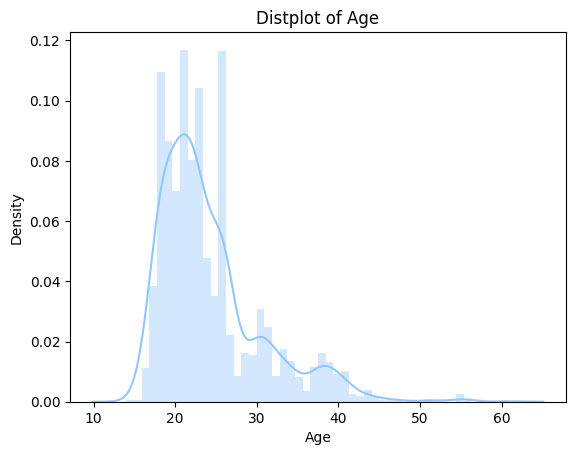

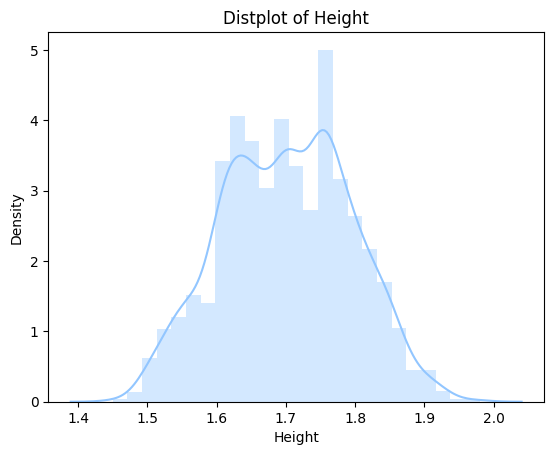

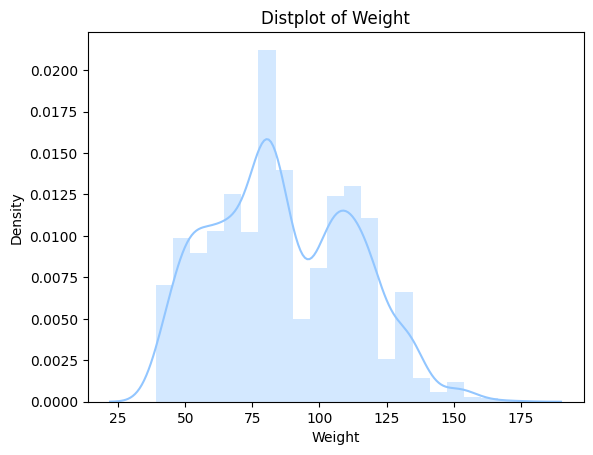

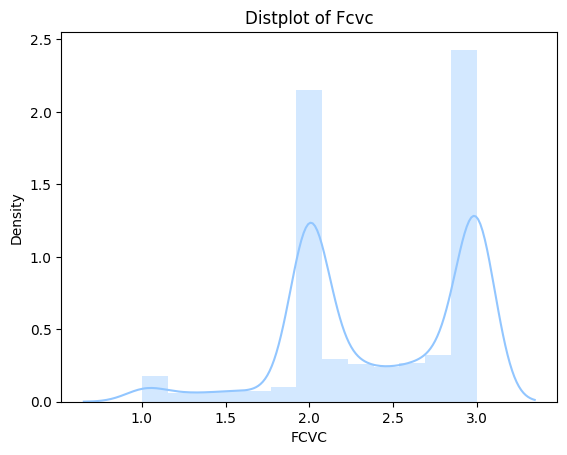

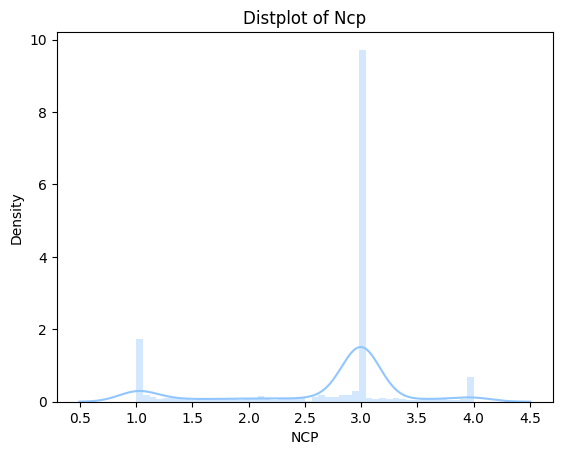

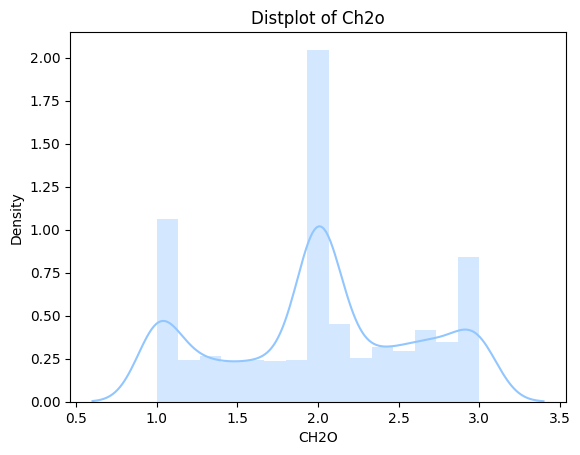

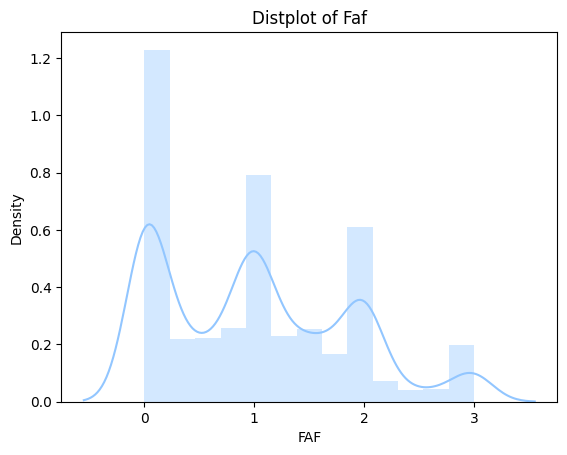

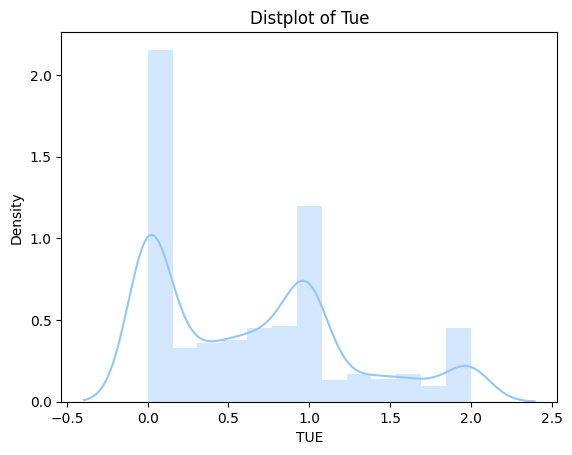

In [138]:
for i in num_cols:
    distploter(i)

In [139]:
#Export data
df.to_csv("data/ObesityDataSet_raw_and_data_sinthetic_fin.csv")

In [140]:
#Import Libs for ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score

In [141]:
#Import  Final Dataset
df=pd.read_csv("data/ObesityDataSet_raw_and_data_sinthetic.csv")

In [142]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [143]:
#Numerical and Categorical columns
num_cols = df.select_dtypes(include='number').columns.to_list()
cat_cols = df.select_dtypes(exclude='number').columns.to_list()
cat_cols = cat_cols[:-1]

In [144]:
#Spliting Train and Test
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=143)

In [145]:
#Initializing the onehotencoding and StandarScaler
oho = OneHotEncoder(drop ="first", sparse=False)
sch = StandardScaler()

In [146]:
d = oho.fit_transform(X_train[cat_cols])
s = sch.fit_transform(X_train[num_cols])
ds =np.concatenate((s,d),axis=1)
dfx_train = pd.DataFrame(ds)

In [147]:
#Transforming the data (NUM and CAT)
dt = oho.transform(X_test[cat_cols])
st = sch.transform(X_test[num_cols])
dst =np.concatenate((st,dt),axis=1)
dfx_test = pd.DataFrame(dst)

In [148]:
# Train and evaluate Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(dfx_train, y_train)
lr_pred = lr_model.predict(dfx_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_f1_score = f1_score(y_test, lr_pred, average='weighted')
print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression F1 Score:", lr_f1_score)

# Train and evaluate Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(dfx_train, y_train)
rf_pred = rf_model.predict(dfx_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1_score = f1_score(y_test, rf_pred, average='weighted')
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest F1 Score:", rf_f1_score)

# Train and evaluate SVM
svm_model = SVC()
svm_model.fit(dfx_train, y_train)
svm_pred = svm_model.predict(dfx_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_f1_score = f1_score(y_test, svm_pred, average='weighted')
print("SVM Accuracy:", svm_accuracy)
print("SVM F1 Score:", svm_f1_score)

# Train and evaluate Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(dfx_train, y_train)
gb_pred = gb_model.predict(dfx_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_f1_score = f1_score(y_test, gb_pred, average='weighted')
print("Gradient Boosting Accuracy:", gb_accuracy)
print("Gradient Boosting F1 Score:", gb_f1_score)


Logistic Regression Accuracy: 0.900709219858156
Logistic Regression F1 Score: 0.9003985607287868
Random Forest Accuracy: 0.9598108747044918
Random Forest F1 Score: 0.9603818898721311
SVM Accuracy: 0.9314420803782506
SVM F1 Score: 0.9317632614913048
Gradient Boosting Accuracy: 0.9574468085106383
Gradient Boosting F1 Score: 0.9575517336897316
